<a href="https://colab.research.google.com/github/Hangaroum119/TIL/blob/main/GDSC10_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##데이터 다루기


---

> 머신러닝

 - 지도학습
 - 비지도학습
 - 강화학습 

  *input : 입력데이터*  
  *target : 정답*
  
</n>   
</n>  
      
> 훈련데이터(Train)와 테스트데이터(Test)

- train data : 모델을 학습시키는 데이터(파라미터 조정)  
- test data : 학습된 모델의 성능을 확인하는 데이터 

</n>   
</n>  
        
> 실제 데이터 다뤄보기

- 데이터 : 도미와 빙어의 길이(length), 무게(weight)

In [68]:
# fish_length : 길이 / fish_weight : 무게 
# -> 이처럼 관찰 대상에 대한 속성(특징 ex)무게,길이)을 표현한 것을 특성(feature)라고 함
# index 0-35 : 도미 /  35-39 : 빙어

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

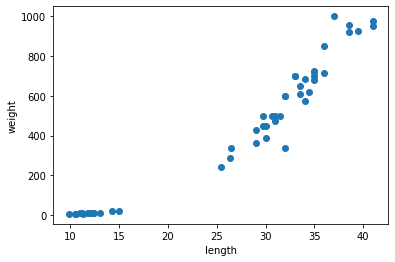

In [ ]:
##시각화

import matplotlib.pyplot as plt #시각화를 위한 라이브러리

plt.scatter(fish_length, fish_weight) #산점도 그래프
plt.xlabel('length') #x축 label
plt.ylabel('weight') #y축 label
plt.show() #그래프에 실제 화면에 출력

In [ ]:
#fish_data : 2차원 리스트
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)] #length,weight을 index 기준으로 쌍으로 묶어 하나의 리스트 변환
fish_target = [1] * 35 + [0] * 14 #1 = 도미, 0 = 빙어로 target변수 생성

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
#비지도학습 : K-Nearest Neighbors (k-최근접 이웃 분류 알고리즘)
from sklearn.neighbors import KNeighborsClassifier #사이킷런에서 KNN 클래스 불러오기
kn = KNeighborsClassifier() 

In [ ]:
#train : test = 35 : 14 비율로 나눔
#이런 식으로 범위 지정해  데이터를 가져오는 것을 "슬라이싱(slicing)"라고 함 
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
kn = kn.fit(train_input,train_target) #모델학습
kn.score(test_input,test_target) #모델평가

0.0

결과가 0.0이 나옴  

[이  유]  
: 샘플링의 편향 때문이다.  
  도미만 공부(Train data) 했는데 갑자기 시험(Test data)에서 빙어가 나온 것이라 생각하면 쉽다.

그럼 데이터를 잘 나눠서 다시 해보자

In [ ]:
import numpy as np #numpy : 파이썬의 대표적인 배열 라이브러리

input_arr = np.array(fish_data) 
target_arr = np.array(fish_target)


print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
input_arr.shape #shape : 배열의 크기를 알려줌

(49, 2)

In [ ]:
np.random.seed(42) #랜덤은 실행할때마다 무작위라서, 일정한 결과를 얻을려고 시드값(seed) 고정
index = np.arange(49) #0-48까지 1(default)을 간격으로 둔 수들을 array형태로 변환
np.random.shuffle(index) #무작위로 섞기
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [ ]:
#train : test = 35 : 14 비율로 나눔
train_input = input_arr[index[:35]] 
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(train_input[0])

[ 32. 340.]


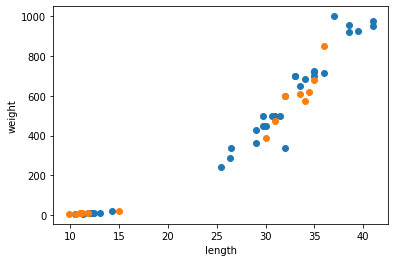

In [ ]:
import matplotlib.pyplot as plt

#train data(파랑색)와 test data(주황색)를 산점도 그래프로 그림
plt.scatter(train_input[:,0], train_input[:,1]) 
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn = kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [ ]:
print(kn.predict([[30,600]])) #new data([30,600])의 class 예측 결과 확인

print(kn.predict(test_input)) #test data의 class 예측 결과 확인
print(test_target)

[1]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


In [ ]:
print(kn.predict([[25,150]])) #길이 25cm, 무게 150g 도미 데이터 

[0]


왜 해당 데이터의 결과는 왜 틀린걸까? 이유는 밑에서 보자

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [70]:
import numpy as np

fish_data = np.column_stack((fish_length,fish_weight))

#np.column_stack() : 한번에 2차원 리스트로 만들어줌
#해당 메소드의 값이 tuple이기에 데이터형을 맞춰줌 

In [ ]:
# 정답 만들기
# np.ones() : 1로 채운 배열 생성
# np.zeros() : 0으로 채운 배열 생성
# np.concatenate() : 두 데이터를 이어서 만들어줌

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
from sklearn.model_selection import train_test_split

#seed값을 42로 고정하고 train,test로 나누기, 기본적으로 25%를 test data로 나눈다. 
train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target,random_state=42)

print(train_input.shape,test_input.shape)
print(train_target.shape,test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [ ]:
print(test_target) 

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


test_target에 도미(class=1)의 비율이 높다.

원본 데이터에서 도미 : 빙어 = 35 : 14로 비율이 2.5 : 1이지만 test_target에선 3.3 : 1이다.  
이처럼 샘플링 했을 때 class 비율이 안 맞는 경우가 존재할 수 있기에 원본 class 비율에 맞춰 샘플링하게 한다.

In [ ]:
##stratify : 매개변수에 타깃 데이터를 전달하면 비율에 맞게 데이터를 나눔
train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)

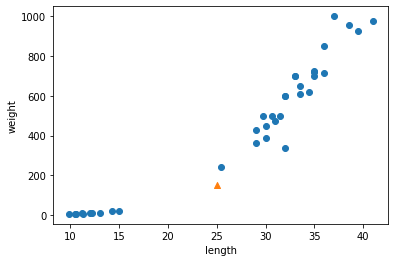

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

import matplotlib.pyplot as plt

#[25,150]이란 데이터만 확인(주황색)
plt.scatter(train_input[:,0],train_input[:,1]) 
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

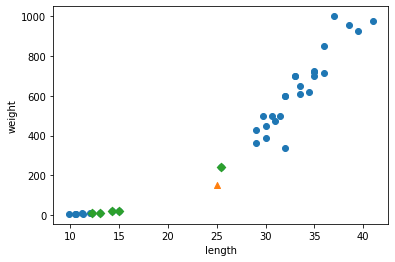

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


In [ ]:
distances, indexes = kn.kneighbors([[25,150]]) 

#[25,150] data(주황색)의 이웃 샘플(초록색)과의 거리 확인
plt.scatter(train_input[:,0],train_input[:,1]) 
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(distances, indexes) #n_neighborsint의 default=5임으로 new_data의 군집을 결정할 때 주변 데이터 5개를 이용해서 군집 결정됨

두 feature(길이,무게) 값의 범위가 매우 다르다. 이처럼 값의 범위를 스케일(Scale)이라 한다.

KNN알고리즘은 거리 기반의 알고리즘이라 데이터 간의 거리에 영향을 많이 받는다. 하지만 길이(length)의 스케일과 무게(weight)의 스케일의 차이가 매우 커서 길이의 의미가 사라져버렸다.
  
이에 feature의 스케일을 맞춰주는 과정이 필요함

In [ ]:
#데이터 스케일링(scaling) - 범위가 다른 데이터들의 범위를 일정하게 맞춰주는 것

# StandardScaler 
#: 기본 스케일로 각 특성의 평균을 0, 분산을 1로 스케일링함. 즉 데이터를 정규분포로 만듬
# (평균을 제거하고 데이터를 단위 분산으로 조정)

mean = np.mean(train_input,axis=0) #평균
std = np.std(train_input,axis=0)  #표준편차
train_scaled = (train_input - mean) / std #이처럼 계산하는 것을 '브로드 캐스팅'라고 함

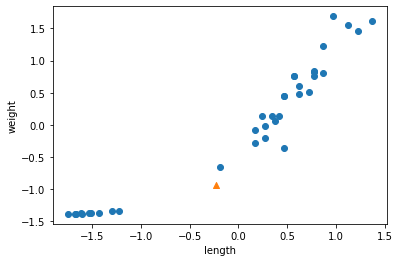

In [ ]:
new = ([25,150]-mean)/std #new data도 스케일 적용
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#x,y축의 범위가 변한 것을 확인 할 수 있음

In [ ]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
test_scaled = (test_input - mean) / std

kn.score(test_scaled,test_target)

1.0

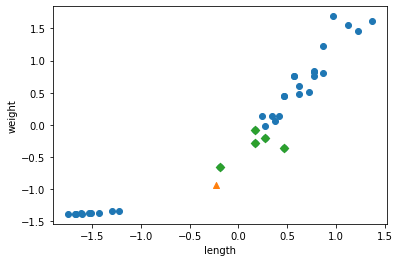

In [ ]:
distances, indexes = kn.kneighbors([new]) #이웃까지의 거리와 인덱스 반환


plt.scatter(train_scaled[:,0],train_scaled[:,1]) 
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

스케일링을 통해 x축의 영향이 생김에 따라 이웃이 바뀌는 것을 확인할 수 있다. new data가 도미임에도 불구하고 빙어라 한 이유는 feature의 범위를 잡아주지 않아서임을 알 수 있다.

오늘 활동을 통해 데이터를 간단하게 다뤄보았다.